<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
!pip install tweepy
import tweepy as tw
!pip install datascience
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install tensorflow
import pandas as pd
import numpy as np
import nltk
from textblob import Word
import nltk
import re

     |████████████████████████████████| 69 kB 2.8 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=03cea679cac87b4fa1a72133b5441942ea3c744eafa2dbd132c9805813348361
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
     |████████████████████████████████| 462 kB 5.2 MB/s 


In [2]:
# Write your code here

from google.colab import files
uploaded = files.upload()
import io
RowTweetdata = pd.read_csv(io.BytesIO(uploaded["CleanDataAva.csv"]))
Tweetdata = RowTweetdata
Tweetdata




Saving CleanDataAva.csv to CleanDataAva.csv


,document_id,RawText,clean_text
0,0,"RT @AfricanArchives: 10 years ago today, at on...",africanarch year ago today unarm trayvon marti...
1,1,"RT @AfricanArchives: 10 years ago today, at on...",africanarch year ago today unarm trayvon marti...
2,2,Learn the concrete steps on how spiritual lead...,learn concret step spiritu leader integr anti ...
3,3,RT @angelicaross: Found the @watchallblk app o...,angelicaross found watchallblk app samsung tv ...
4,4,"RT @AfricanArchives: 10 years ago today, at on...",africanarch year ago today unarm trayvon marti...
...,...,...,...
9995,9995,RT @DeccanHerald: A jury found three former Mi...,deccanherald a juri found three former minneap...
9996,9996,RT @Alima1000: The trustees of GEMS have aucti...,alima the truste gem auction fiduciari duti kk...
9997,9997,"RT @marrs_edward: I know there's a war but,\n#...",marr edward i know war blacklivesmatt plea fre...
9998,9998,RT @OldMainBell: Ding ding* ding Ding &amp; Di...,oldmainbel ding ding ding ding amp ding ding d...


In [4]:
#CSV file
Cleandata01 = Tweetdata[['clean_text']]
Cleandata01.to_csv('CleanData5.csv', index=False)
Cleandata01


,clean_text
0,africanarch year ago today unarm trayvon marti...
1,africanarch year ago today unarm trayvon marti...
2,learn concret step spiritu leader integr anti ...
3,angelicaross found watchallblk app samsung tv ...
4,africanarch year ago today unarm trayvon marti...
...,...
9995,deccanherald a juri found three former minneap...
9996,alima the truste gem auction fiduciari duti kk...
9997,marr edward i know war blacklivesmatt plea fre...
9998,oldmainbel ding ding ding ding amp ding ding d...


In [5]:
import nltk
from nltk.util import ngrams

In [6]:
#create unigram

cleandata02 = open('/content/CleanData5.csv', "r")
unigrams = ngrams(cleandata02.read().split(), 1)
unigramswithfrequency=nltk.FreqDist(unigrams)
unigramswithfrequency

FreqDist({('clean_text',): 1,
          ('africanarch',): 1505,
          ('year',): 2119,
          ('ago',): 1679,
          ('today',): 1851,
          ('unarm',): 1593,
          ('trayvon',): 1897,
          ('martin',): 1848,
          ('shot',): 1544,
          ('dead',): 1520,
          ('georg',): 1607,
          ('zimmerman',): 1548,
          ('fuel',): 1510,
          ('movement',): 1580,
          ('blac',): 1566,
          ('learn',): 41,
          ('concret',): 2,
          ('step',): 17,
          ('spiritu',): 110,
          ('leader',): 50,
          ('integr',): 6,
          ('anti',): 50,
          ('racism',): 672,
          ('ministri',): 6,
          ('leadership',): 8,
          ('commun',): 86,
          ('click',): 14,
          ('info',): 14,
          ('http',): 3803,
          ('co',): 3563,
          ('jofotswpu',): 2,
          ('dismantlewhitesupremaci',): 1,
          ('thisisamerica',): 1,
          ('racialjustic',): 4,
          ('racisminamerica',):

In [7]:
#(1) Count the frequency of all the N-grams (N=3)

cleandata02 = open('/content/CleanData5.csv', "r")
trigrams = ngrams(cleandata02.read().split(), 3)
trigramswithfrequency=nltk.FreqDist(trigrams)
trigramswithfrequency

FreqDist({('clean_text', 'africanarch', 'year'): 1,
          ('africanarch', 'year', 'ago'): 1502,
          ('year', 'ago', 'today'): 1590,
          ('ago', 'today', 'unarm'): 1503,
          ('today', 'unarm', 'trayvon'): 1503,
          ('unarm', 'trayvon', 'martin'): 1505,
          ('trayvon', 'martin', 'shot'): 1514,
          ('martin', 'shot', 'dead'): 1506,
          ('shot', 'dead', 'georg'): 1503,
          ('dead', 'georg', 'zimmerman'): 1503,
          ('georg', 'zimmerman', 'fuel'): 1505,
          ('zimmerman', 'fuel', 'movement'): 1503,
          ('fuel', 'movement', 'blac'): 1502,
          ('movement', 'blac', 'africanarch'): 756,
          ('blac', 'africanarch', 'year'): 755,
          ('movement', 'blac', 'learn'): 1,
          ('blac', 'learn', 'concret'): 1,
          ('learn', 'concret', 'step'): 2,
          ('concret', 'step', 'spiritu'): 2,
          ('step', 'spiritu', 'leader'): 2,
          ('spiritu', 'leader', 'integr'): 2,
          ('leader', 'integr

In [8]:
#Create biagram 

cleandata02 = open('/content/CleanData5.csv', "r")
biagrams = ngrams(cleandata02.read().split(), 2)
biagramswithfrequency=nltk.FreqDist(biagrams)
biagramswithfrequency

FreqDist({('clean_text', 'africanarch'): 1,
          ('africanarch', 'year'): 1502,
          ('year', 'ago'): 1653,
          ('ago', 'today'): 1593,
          ('today', 'unarm'): 1503,
          ('unarm', 'trayvon'): 1505,
          ('trayvon', 'martin'): 1833,
          ('martin', 'shot'): 1514,
          ('shot', 'dead'): 1508,
          ('dead', 'georg'): 1503,
          ('georg', 'zimmerman'): 1547,
          ('zimmerman', 'fuel'): 1505,
          ('fuel', 'movement'): 1506,
          ('movement', 'blac'): 1502,
          ('blac', 'africanarch'): 757,
          ('blac', 'learn'): 1,
          ('learn', 'concret'): 2,
          ('concret', 'step'): 2,
          ('step', 'spiritu'): 2,
          ('spiritu', 'leader'): 2,
          ('leader', 'integr'): 2,
          ('integr', 'anti'): 2,
          ('anti', 'racism'): 2,
          ('racism', 'ministri'): 2,
          ('ministri', 'spiritu'): 2,
          ('spiritu', 'leadership'): 2,
          ('leadership', 'commun'): 2,
         

In [9]:
#(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). 
#For example, count(really like) / count(really) = 1 / 3 = 0.33

def probabilityinbigram():
    for bigram_values in biagramswithfrequency:
       
        print(("bigram values", bigram_values,"Probability :",biagramswithfrequency[bigram_values]/unigramswithfrequency[(bigram_values[0],)]))

probabilityinbigram()

Streaming output truncated to the last 5000 lines.
('bigram values', ('need', 'push'), 'Probability :', 0.0049504950495049506)
('bigram values', ('push', 'eac'), 'Probability :', 0.08333333333333333)
('bigram values', ('eac', 'innoc'), 'Probability :', 1.0)
('bigram values', ('peopl', 'hurt'), 'Probability :', 0.0008488964346349745)
('bigram values', ('hurt', 'name'), 'Probability :', 0.07692307692307693)
('bigram values', ('name', 'greed'), 'Probability :', 0.010752688172043012)
('bigram values', ('greed', 'violenc'), 'Probability :', 0.03225806451612903)
('bigram values', ('violenc', 'amp'), 'Probability :', 0.04)
('bigram values', ('amp', 'capit'), 'Probability :', 0.0019120458891013384)
('bigram values', ('capit', 'prayforukrain'), 'Probability :', 0.3333333333333333)
('bigram values', ('prayforukrain', 'blacklivesmatt'), 'Probability :', 1.0)
('bigram values', ('co', 'powafulimpak'), 'Probability :', 0.000280662363177098)
('bigram values', ('urbanshaman', 'theliberatedselftherapeu

In [10]:
from textblob import TextBlob

In [11]:
#part3
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

Data = open('/content/CleanData5.csv', "r")

Noun = lambda pos: pos[:2] == 'NN'
tokenized = nltk.word_tokenize(Data.read())
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if Noun(pos)] 

print(nouns)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
['clean_text', 'africanarch', 'year', 'today', 'trayvon', 'martin', 'shot', 'georg', 'zimmerman', 'fuel', 'movement', 'blac', 'year', 'today', 'trayvon', 'martin', 'shot', 'georg', 'zimmerman', 'fuel', 'movement', 'blac', 'learn', 'step', 'leader', 'integr', 'racism', 'ministri', 'leadership', 'commun', 'click', 'info', 'http', 'co', 'jofotswpu', 'dismantlewhitesupremaci', 'thisisamerica', 'racisminamerica', 'blacklivesmatt', 'http', 'co', 'yfbwhrul', 'angelicaross', 'app', 'tv', 'watch', 'blacklivesmatt', 'year', 'today', 'trayvon', 'martin', 'shot', 'georg', 'zimmerman', 'fuel', 'movement', 'blac', 'south', 'gem', 'audac', 'repeat', 'realiti', 'apartheid', 'discrimin', 'rsfvfielij', 'cmscaresu', 'thedpsa', 'tourism', 'gov

In [12]:

import nltk
nltk.download('brown')

Data = open('/content/CleanData5.csv', "r")

blob = TextBlob(Data.read())
Nounphrases = blob.noun_phrases
print(Nounphrases) 

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
['clean_text africanarch year', 'unarm trayvon martin shot', 'dead georg zimmerman fuel movement blac africanarch year', 'unarm trayvon martin shot', 'dead georg zimmerman fuel movement blac', 'concret step spiritu leader integr', 'racism ministri spiritu leadership commun click info http co jofotswpu dismantlewhitesupremaci thisisamerica racialjustic racisminamerica blacklivesmatt http co yfbwhrul angelicaross', 'watchallblk app samsung tv', 'beyondedbuck blacklivesmatt africanarch year', 'unarm trayvon martin shot', 'dead georg zimmerman fuel movement blac', 'africa gem audac repeat realiti apartheid discrimin http co rsfvfielij cmscaresu thedpsa healthza tourism gov za qm ir constitut', 'eff sectioninvestig pac blacklivesmatt icantbreath thedaytheori http co vnthwybfli rgarcia sport trayvon martin murder', 'rip blm blacklivesmatt http co bhzuxjn africanarch year', 'unarm trayvon ma

In [13]:
#creating table

df01 = pd.DataFrame(Nounphrases, columns = ['Noun_Phrases'])
df01 

,Noun_Phrases
0,clean_text africanarch year
1,unarm trayvon martin shot
2,dead georg zimmerman fuel movement blac africa...
3,unarm trayvon martin shot
4,dead georg zimmerman fuel movement blac
...,...
18515,civil right georgefloyd alima
18516,truste gem auction fiduciari duti kkk medicala...
18517,war blacklivesmatt plea freeleonardpelti stopa...
18518,pennstat blacklivesmatt justiceforal alima


In [14]:

table = nltk.FreqDist(df01['Noun_Phrases'])
table 



FreqDist({'clean_text africanarch year': 1,
          'unarm trayvon martin shot': 1503,
          'dead georg zimmerman fuel movement blac africanarch year': 754,
          'dead georg zimmerman fuel movement blac': 65,
          'concret step spiritu leader integr': 2,
          'racism ministri spiritu leadership commun click info http co jofotswpu dismantlewhitesupremaci thisisamerica racialjustic racisminamerica blacklivesmatt http co yfbwhrul angelicaross': 1,
          'watchallblk app samsung tv': 2,
          'beyondedbuck blacklivesmatt africanarch year': 1,
          'africa gem audac repeat realiti apartheid discrimin http co rsfvfielij cmscaresu thedpsa healthza tourism gov za qm ir constitut': 4,
          'eff sectioninvestig pac blacklivesmatt icantbreath thedaytheori http co vnthwybfli rgarcia sport trayvon martin murder': 1,
          'rip blm blacklivesmatt http co bhzuxjn africanarch year': 2,
          'dead georg zimmerman fuel movement blac truewordsrspok keithbo

In [16]:
import pandas
list_name  = table.keys()
list_values = table.values()

df = pandas.DataFrame (list_name, list_values)
df = df.drop_duplicates()
df = df.reset_index()
df = df.rename(columns={'index': 'Frq', 0: 'w1'})

df

,Frq,w1
0,1,clean_text africanarch year
1,1503,unarm trayvon martin shot
2,754,dead georg zimmerman fuel movement blac africa...
3,65,dead georg zimmerman fuel movement blac
4,2,concret step spiritu leader integr
...,...,...
8373,1,civil right georgefloyd alima
8374,1,truste gem auction fiduciari duti kkk medicala...
8375,1,war blacklivesmatt plea freeleonardpelti stopa...
8376,1,pennstat blacklivesmatt justiceforal alima


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [18]:
# Write your code here

#(1) To build the documents-terms weights (tf*idf) matrix bold text.


tf1 = (Cleandata01['clean_text']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1


,words,tf
0,africanarch,1505.0
1,year,2119.0
2,ago,1679.0
3,today,1851.0
4,unarm,1593.0
...,...,...
10780,arjunpatel,1.0
10781,nrn,1.0
10782,mcbride,1.0
10783,mhctfao,1.0


In [19]:
#tf*idf

for i,j in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(Cleandata01[Cleandata01['clean_text'].str.contains(j)])))
tf1['tf*idf'] = tf1['tf'] * tf1['idf']
tf1


,words,tf,idf,tf*idf
0,africanarch,1505.0,1.716816,2583.808568
1,year,2119.0,1.391800,2949.224328
2,ago,1679.0,1.599107,2684.900853
3,today,1851.0,1.506109,2787.806986
4,unarm,1593.0,1.659990,2644.364375
...,...,...,...,...
10780,arjunpatel,1.0,9.033365,9.033365
10781,nrn,1.0,5.567629,5.567629
10782,mcbride,1.0,9.033365,9.033365
10783,mhctfao,1.0,9.033365,9.033365


In [20]:
#(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting 
#performance and best character development") by using cosine similarity.



from sklearn.feature_extraction.text import TfidfTransformer


import numpy.linalg as LA
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
trainset = Cleandata01['clean_text'].values.tolist() 

set = "alima the truste gem auction fiduciari duti kkk medicalaidracialprofil http co pki" 
set = [set]
stopWords = stopwords.words('english')
vzer = CountVectorizer(stop_words = stopWords)

transformer = TfidfTransformer()


tnVectorizerArray = vzer.fit_transform(trainset).toarray()
ttVectorizerArray = vzer.transform(set).toarray()
cx = lambda a, b : np.inner(a, b)/(LA.norm(a)*LA.norm(b))
cosine_values = []

In [26]:
for vector in tnVectorizerArray:
        for testV in ttVectorizerArray:
            cosine = cx(vector, testV)
            cosine_values.append(cosine)

In [28]:
df03 = Cleandata01.filter(['CleanText'], axis=1)
se = pd.Series(cosine_values)
df03['Cosine_similarity'] = se.values
df03

,Cosine_similarity
0,0.000000
1,0.000000
2,0.216612
3,0.000000
4,0.000000
...,...
9995,0.000000
9996,1.000000
9997,0.000000
9998,0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [29]:
# Write your code here

import gensim

from gensim.models import Word2Vec
from gensim import models



In [37]:
list01 = []
for i in df.index:
    y = str(Cleandata01["clean_text"][i]).split()
    list01.append(y)

Model01 = Word2Vec(list01, size = 300)
print(Model01)

Word_01 = list(Model01.wv.vocab)
Word_01

print(Model01['word'])


Word2Vec(vocab=2410, size=300, alpha=0.025)
[-0.00232556 -0.0467329  -0.00184144 -0.07330146 -0.08607812 -0.00404929
 -0.15664747 -0.01268646  0.01632529  0.05105196 -0.04009937 -0.04349203
  0.04569765 -0.09635053  0.11589425 -0.01423653  0.0026372   0.20151214
  0.08957256  0.07275723 -0.03079666 -0.09543936 -0.01839612  0.00509236
 -0.05337356  0.00824086 -0.13447101  0.16862111  0.0146327  -0.08827652
  0.07420862 -0.02843262  0.06127041 -0.01944036 -0.0014277   0.15598118
 -0.01682159 -0.02230828  0.04289686 -0.07029165 -0.00716979  0.07465267
  0.01780174  0.07631813  0.08996747 -0.0827167  -0.08882416  0.04845489
 -0.08251785  0.00359414  0.07576455  0.06193054  0.05553104  0.00232938
  0.05178627 -0.02531962  0.03599352  0.04604172 -0.05297044 -0.06758953
  0.04182832 -0.02388008  0.03968439 -0.06110051 -0.03347261 -0.07924175
  0.10899813 -0.04808468 -0.00638169  0.0765707  -0.04515632 -0.06570298
  0.04000816 -0.12954259  0.0435541  -0.08056694  0.15852821  0.00980877
  0.078

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [39]:
#(2) Visualize the word embedding model you created.
from sklearn.decomposition import PCA

X = Model01[Model01.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


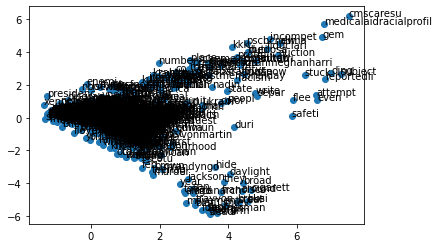

In [41]:


import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(Model01.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [42]:
# The GitHub link of your final csv file



# Link: 

print ("CSV file : https://github.com/avahajian/Ava_INFO5731_Spring2022/blob/main/sentimentdata02%20.csv")



CSV file : https://github.com/avahajian/Ava_INFO5731_Spring2022/blob/main/sentimentdata02%20.csv
